In [1]:
from neurodamus.core import Cell
from neurodamus.core import CurrentSource
from neurodamus.core import Neuron
from neurodamus.core import mechanisms
from neurodamus.core.stimuli import RealElectrode, ConstantEfield, PointSourceElectrode
from neuron import h
import numpy as np


# Change v_init globally
# Alternatively v_init can be configured per simulation in run_sim(**kw)
Neuron.Simulation.v_init = -70


def test_tut1(quick=True):
    
    
    c = Cell.Builder.add_soma(60).create()
    hh = Cell.Mechanisms.HH(gkbar=0.0, gnabar=0.0, el=-70)
    hh.apply(c.soma)
    
    h.pt3dadd(1,0,0,1,sec=c.soma)
        

    stim = ConstantEfield('Extracellular', 10, 'Pulse',
                          10, [.001], None, [10], None, None, 0.025, 0,0,np.array([1,0,0]),'x',[0,0,0])
    stim.attach_to(c.soma, 0.5)
    


    # clamp = StimuliSource.pulse(0.1, 50, delay=10).attach_to(c.soma)  # eqv. to Constant()
    #CurrentSource.Constant(0.1, 50, 10).attach_to(c.soma)
    Neuron.run_sim(100, c.soma).plot()
    if quick:
        return stim, c

--No graphics will be displayed.


In [19]:
from neurodamus.core import Cell
from neurodamus.core import CurrentSource
from neurodamus.core import Neuron
from neurodamus.core import mechanisms
from neurodamus.core.stimuli import RealElectrode, ConstantEfield, PointSourceElectrode
from neuron import h
import numpy as np


# Change v_init globally
# Alternatively v_init can be configured per simulation in run_sim(**kw)
Neuron.Simulation.v_init = -70


def test_tut1(offset, quick=True):
    
    
    c = Cell.Builder.add_soma(60).create()
    hh = Cell.Mechanisms.HH(gkbar=0.0, gnabar=0.0, el=-70)
    hh.apply(c.soma)
    
    c = (c.builder
     .add_dendrite("dend", 400, 9, diam=2, Ra=100)
     .add_dendrite("dend2", 400, 9, diam=2, Ra=100)
     .create())

    
    h.pt3dadd(0,0,0,1,sec=c.soma)
    
    for i in range(c.dendrites[0].nseg):
        h.pt3dadd(i/c.dendrites[0].nseg*400,.5,0,2,sec=c.dendrites[0])
        
    for i in range(c.dendrites[1].nseg):
        h.pt3dadd(i/c.dendrites[1].nseg*400,-.5,0,2,sec=c.dendrites[1])
        

    stim = ConstantEfield('Extracellular', 10, 'Pulse',
                          100, [.001], None, [100], None, None, 0.025, 0,0,np.array([offset,0,0]),'x',[0,0,0])
    
    for sec in c.all:
        for seg in sec:
            stim.attach_to(sec, seg.x)
    


#     # clamp = StimuliSource.pulse(0.1, 50, delay=10).attach_to(c.soma)  # eqv. to Constant()
#     #CurrentSource.Constant(0.1, 50, 10).attach_to(c.soma)
    #result = Neuron.run_sim(100, c.soma)#.plot()
    
    #return result #stim, c


#     # Execution with Active channels
    hh.gkbar = 0.01
    hh.gnabar = 0.2
    hh.apply(c.soma)
    sim = Neuron.run_sim(200, c.soma)
    
    return sim
#     # sim.run_continue(100)
#     sim.plot()

#     # Extending the model with dendrites

#     mechanisms.HH(el=-70, gl=5e-4, gkbar=.0, gnabar=.0).apply(c.dendrites)
#     Neuron.run_sim(50, c.dendrites[0]).plot()

#     Cell.show_topology()
#     Neuron.h.psection(sec=c.dendrites[0])

In [20]:
r1 = test_tut1(1, True)

[0. 0. 0.]


In [21]:
r0 = test_tut1(0, True)

[0. 0. 0.]


<Figure size 640x480 with 0 Axes>

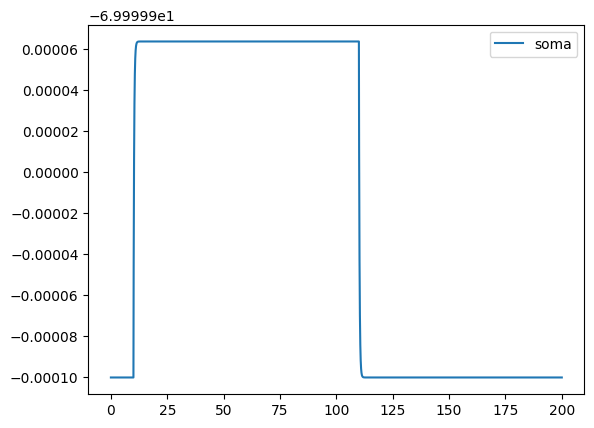

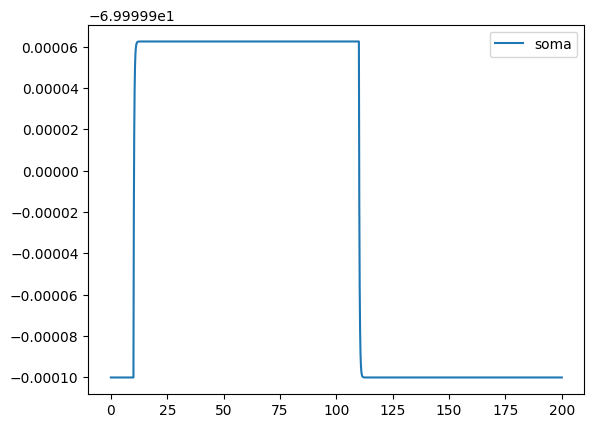

In [22]:
import matplotlib.pyplot as plt
plt.figure()
r1.plot()
r0.plot()

In [8]:
cell.soma.e_extracellular

10.0

In [79]:
stim.extracellulars[1].to_python()

[0.0, 0.0, 0.001, 0.001, 0.0]

In [80]:
stim0.extracellulars[1].to_python()

[0.0, 0.0, 0.0, 0.0, 0.0]